In [1]:
# Importing required libraries for further analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
%matplotlib inline

In [2]:
# Loading data from .csv file into pandas DataFrame

file = 'Bank_Customers.csv'

data = pd.read_csv(file)

In [3]:
# Viewing the Data

data.head()

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance
0,100000001,Simon,Walsh,Male,21,England,White Collar,05.Jan.15,113810.15
1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,06.Jan.15,36919.73
2,100000003,Liam,Brown,Male,46,England,White Collar,07.Jan.15,101536.83
3,300000004,Trevor,Parr,Male,32,Wales,White Collar,08.Jan.15,1421.52
4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,09.Jan.15,35639.79


In [4]:
# Information about the Dataset. Data is clean with no missing values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014 entries, 0 to 4013
Data columns (total 9 columns):
Customer ID           4014 non-null int64
Name                  4014 non-null object
Surname               4014 non-null object
Gender                4014 non-null object
Age                   4014 non-null int64
Region                4014 non-null object
Job Classification    4014 non-null object
Date Joined           4014 non-null object
Balance               4014 non-null float64
dtypes: float64(1), int64(2), object(6)
memory usage: 282.4+ KB


In [5]:
# Basic Descriptive Statistics

data.describe()

,Customer ID,Age,Balance
count,4.014000e+03,4014.000000,4014.000000
mean,1.696831e+08,38.611111,39766.448274
std,8.865374e+07,9.819121,29859.489192
min,1.000000e+08,15.000000,11.520000
25%,1.000020e+08,31.000000,16115.367500
50%,1.000038e+08,37.000000,33567.330000
75%,2.000031e+08,45.000000,57533.930000
max,4.000038e+08,64.000000,183467.700000


In [6]:
# Transforming Customer ID column to the category type to avoid misleading summary statistics

data['Customer ID'] = data['Customer ID'].astype('category')

In [7]:
data.describe()

,Age,Balance
count,4014.000000,4014.000000
mean,38.611111,39766.448274
std,9.819121,29859.489192
min,15.000000,11.520000
25%,31.000000,16115.367500
50%,37.000000,33567.330000
75%,45.000000,57533.930000
max,64.000000,183467.700000


In [8]:
# Discovering regions info for further analysis. There are 4 regions comprising the UK

data['Region'].unique()

array(['England', 'Northern Ireland', 'Wales', 'Scotland'], dtype=object)

# Customer Baseline

In [9]:
Gender = data['Gender'].value_counts()
print(Gender.index)

Index(['Male', 'Female'], dtype='object')


In [10]:
Jobs = data['Job Classification'].value_counts()
Jobs_sorted = Jobs.sort_values(ascending=False)
Jobs_sorted_p = round(Jobs_sorted/Jobs.sum() * 100, 2)

In [11]:
def age_dist(data, bins, color, ax, title, xlabel, xticks):
    '''Takes in Age column, Bins, Color, ax location, Plot Title, x label and x_ticks to construct age distribution'''
    
    sns.distplot(data, bins=bins, color=color, ax=ax)
    ax.set_title(title, fontsize=15, color='black')
    ax.set_xlabel(xlabel, fontsize=12, color='black')
    ax.set_xticks(xticks)

In [12]:
def balance_dist(data, bins, color, ax, title, xlabel):
    '''Takes in Balance column, bins, color, ax location, Plot Title and x label to construct balance distribution'''
    
    sns.distplot(data, bins=bins, color=color, ax=ax)
    ax.set_title(title, fontsize=15, color='black')
    ax.set_xlabel(xlabel, fontsize=12, color='black')

In [13]:
def gender_pie(gender_count, ax, title, labels):
    '''Takes in Gender Count Series, ax location, labels adn title to construct gender pie chart'''
    
    ax.pie(gender_count, labels=labels, autopct='%.1f%%', \
           textprops={'fontsize' : 15}, colors=['slateblue', 'red'])
    ax.set_title(title, fontsize=15, color='black')

In [14]:
def job_treemap(sizes, label, ax, title):
    '''Takes in Branch sizes in panda series, label and ax location to construct job classification treemap'''
    
    squarify.plot(sizes=sizes, color=['linen', 'b', 'g'], label=label,
                 text_kwargs={'fontsize':15}, ax=ax)
    ax.set_title(title, fontsize=15, color='black')

In [15]:
#Setting bins for Age Distribution Histogram

age_bins = [0,10,20,30,40,50,60]

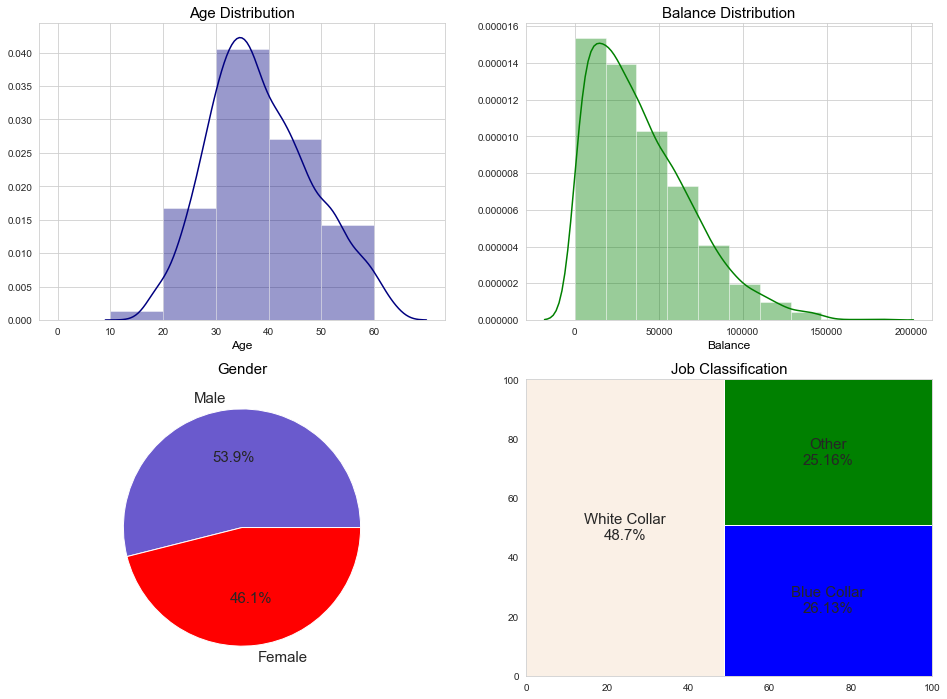

In [16]:
sns.set_style('whitegrid')

f, ax = plt.subplots(2,2, figsize = (16,12))

age_dist(data['Age'], age_bins, 'navy', ax[0,0], 'Age Distribution', 'Age', age_bins)

balance_dist(data['Balance'], 10, 'green', ax[0,1], 'Balance Distribution', 'Balance')

gender_pie(Gender, ax[1,0], 'Gender', Gender.index)

job_treemap(Jobs_sorted, Jobs.index + '\n' + Jobs_sorted_p.astype('str') + '%', ax[1,1], 'Job Classification')

# 1. England Customers

In [17]:
ENG_Age = data[data['Region'] == 'England']['Age'] #Age of English customers
ENG_Balance = data[data['Region'] == 'England']['Balance'] #Balance of English customers
ENG_Gender = data[data['Region'] == 'England']['Gender'].value_counts() #Sum of Genders in England
ENG_Jobs = data[data['Region'] == 'England']['Job Classification'].value_counts() #Job Classifications in England
ENG_Gender

Female    1091
Male      1068
Name: Gender, dtype: int64

In [18]:
ENG_Jobs_sorted = ENG_Jobs.sort_values(ascending=False)
ENG_Jobs_sorted_p = round(ENG_Jobs_sorted/ENG_Jobs.sum() * 100, 2)
print(ENG_Jobs_sorted)
print(ENG_Jobs_sorted_p)

White Collar    1501
Blue Collar      344
Other            314
Name: Job Classification, dtype: int64
White Collar    69.52
Blue Collar     15.93
Other           14.54
Name: Job Classification, dtype: float64


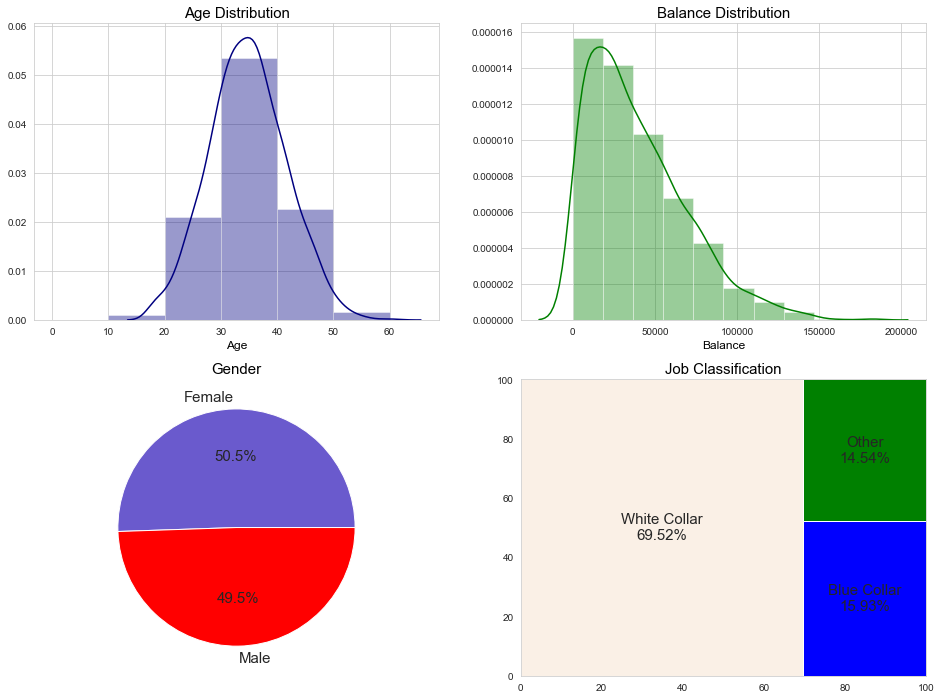

In [19]:
sns.set_style('whitegrid')

f, ax = plt.subplots(2,2, figsize = (16,12))

age_dist(ENG_Age, age_bins, 'navy', ax[0,0], 'Age Distribution', 'Age', age_bins)

balance_dist(ENG_Balance, 10, 'green', ax[0,1], 'Balance Distribution', 'Balance')

gender_pie(ENG_Gender, ax[1,0], 'Gender', ENG_Gender.index)

job_treemap(ENG_Jobs_sorted, ENG_Jobs_sorted.index + '\n' + ENG_Jobs_sorted_p.astype('str') + '%', 
            ax[1,1], 'Job Classification')

### Most of the customers in England are White Collar workers in their mid 30s. Most likely, these client are professionals, who work in a corporate sector in London, one of the most important global cities.

# 2. Scotland Customers

In [20]:
SCT_Age = data[data['Region'] == 'Scotland']['Age'] #Age of Scottish customers
SCT_Balance = data[data['Region'] == 'Scotland']['Balance'] #Balance of Scottish customers
SCT_Gender = data[data['Region'] == 'Scotland']['Gender'].value_counts() #Sum of Genders in Scotland
SCT_Jobs = data[data['Region'] == 'Scotland']['Job Classification'].value_counts() #Job Classifications in Scotland
SCT_Gender

Male      805
Female    319
Name: Gender, dtype: int64

In [21]:
SCT_Jobs_sorted = SCT_Jobs.sort_values(ascending=False)
SCT_Jobs_sorted_p = round(SCT_Jobs_sorted/SCT_Jobs.sum() * 100, 2)
print(SCT_Jobs_sorted)
print(SCT_Jobs_sorted_p)

Blue Collar     544
Other           496
White Collar     84
Name: Job Classification, dtype: int64
Blue Collar     48.40
Other           44.13
White Collar     7.47
Name: Job Classification, dtype: float64


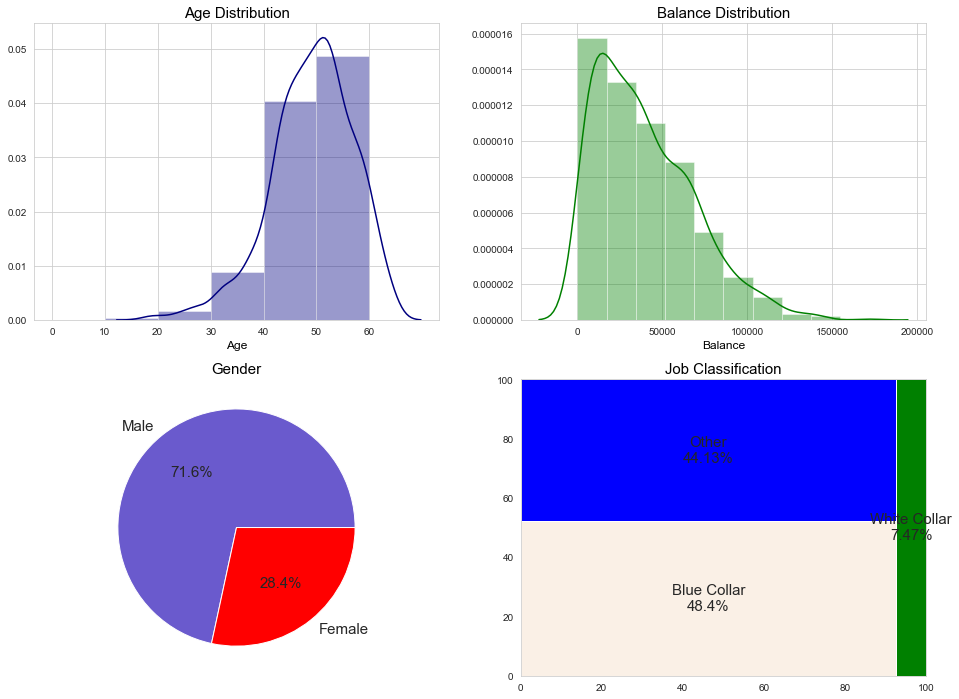

In [22]:
sns.set_style('whitegrid')

f, ax = plt.subplots(2,2, figsize = (16,12))

age_dist(SCT_Age, age_bins, 'navy', ax[0,0], 'Age Distribution', 'Age', age_bins)

balance_dist(SCT_Balance, 10, 'green', ax[0,1], 'Balance Distribution', 'Balance')

gender_pie(SCT_Gender, ax[1,0], 'Gender', SCT_Gender.index)

job_treemap(SCT_Jobs_sorted, SCT_Jobs_sorted.index + '\n' + SCT_Jobs_sorted_p.astype('str') + '%', 
            ax[1,1], 'Job Classification')

### Most of the Scottish customers are Blue Collar Males. There is a high concentration of clients in their 40s and 50s.

# 3. Wales Customers

In [23]:
WAL_Age = data[data['Region'] == 'Wales']['Age'] #Age of Welsh customers
WAL_Balance = data[data['Region'] == 'Wales']['Balance'] #Balance of Welsh customers
WAL_Gender = data[data['Region'] == 'Wales']['Gender'].value_counts() #Sum of Genders in Wales
WAL_Jobs = data[data['Region'] == 'Wales']['Job Classification'].value_counts() #Job Classifications in Wales
WAL_Gender

Female    282
Male      238
Name: Gender, dtype: int64

In [24]:
WAL_Jobs_sorted = WAL_Jobs.sort_values(ascending=False)
WAL_Jobs_sorted_p = round(WAL_Jobs_sorted/WAL_Jobs.sum() * 100, 2)
print(WAL_Jobs_sorted)
print(WAL_Jobs_sorted_p)

White Collar    305
Blue Collar     120
Other            95
Name: Job Classification, dtype: int64
White Collar    58.65
Blue Collar     23.08
Other           18.27
Name: Job Classification, dtype: float64


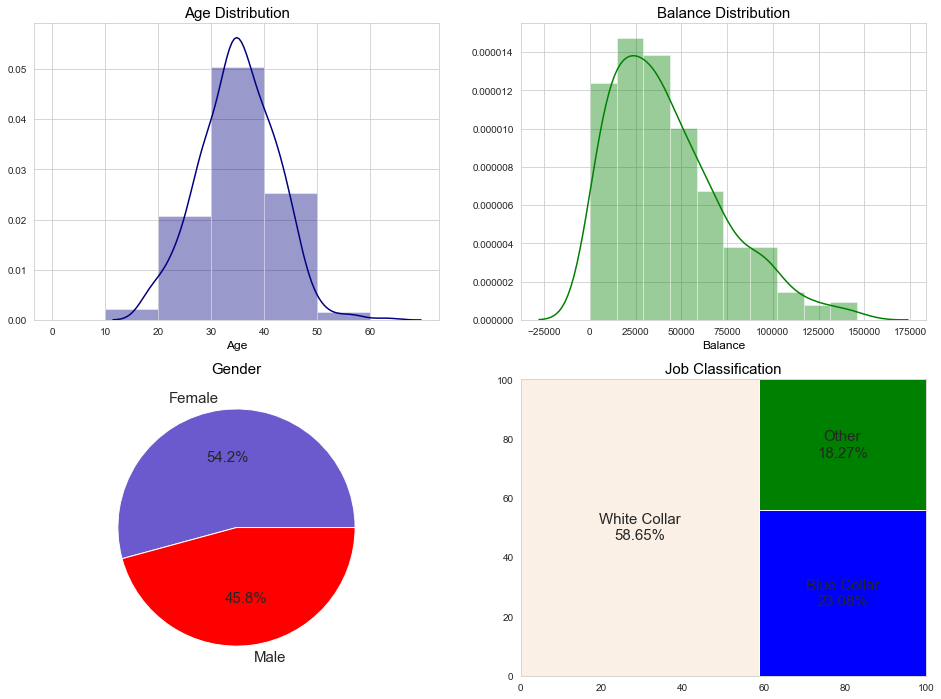

In [25]:
sns.set_style('whitegrid')

f, ax = plt.subplots(2,2, figsize = (16,12))

age_dist(WAL_Age, age_bins, 'navy', ax[0,0], 'Age Distribution', 'Age', age_bins)

balance_dist(WAL_Balance, 10, 'green', ax[0,1], 'Balance Distribution', 'Balance')

gender_pie(WAL_Gender, ax[1,0], 'Gender', WAL_Gender.index)

job_treemap(WAL_Jobs_sorted, WAL_Jobs_sorted.index + '\n' + WAL_Jobs_sorted_p.astype('str') + '%', 
            ax[1,1], 'Job Classification')

### Most of the Welsh customers are in their mid 30s. Welsh clients have higher number of mid-size balances.

# 4. Northern Ireland Customers

In [26]:
NIR_Age = data[data['Region'] == 'Northern Ireland']['Age'] #Age of Northern Irish customers
NIR_Balance = data[data['Region'] == 'Northern Ireland']['Balance'] #Balance of Northern Irish customers
NIR_Gender = data[data['Region'] == 'Northern Ireland']['Gender'].value_counts() #Sum of Genders in Northern Ireland
NIR_Jobs = data[data['Region'] == 'Northern Ireland']['Job Classification'].value_counts() #Job Classifications in Northern Ireland
NIR_Gender

Female    157
Male       54
Name: Gender, dtype: int64

In [27]:
NIR_Jobs_sorted = NIR_Jobs.sort_values(ascending=False)
NIR_Jobs_sorted_p = round(NIR_Jobs_sorted/NIR_Jobs.sum() * 100, 2)
print(NIR_Jobs_sorted)
print(NIR_Jobs_sorted_p)

Other           105
White Collar     65
Blue Collar      41
Name: Job Classification, dtype: int64
Other           49.76
White Collar    30.81
Blue Collar     19.43
Name: Job Classification, dtype: float64


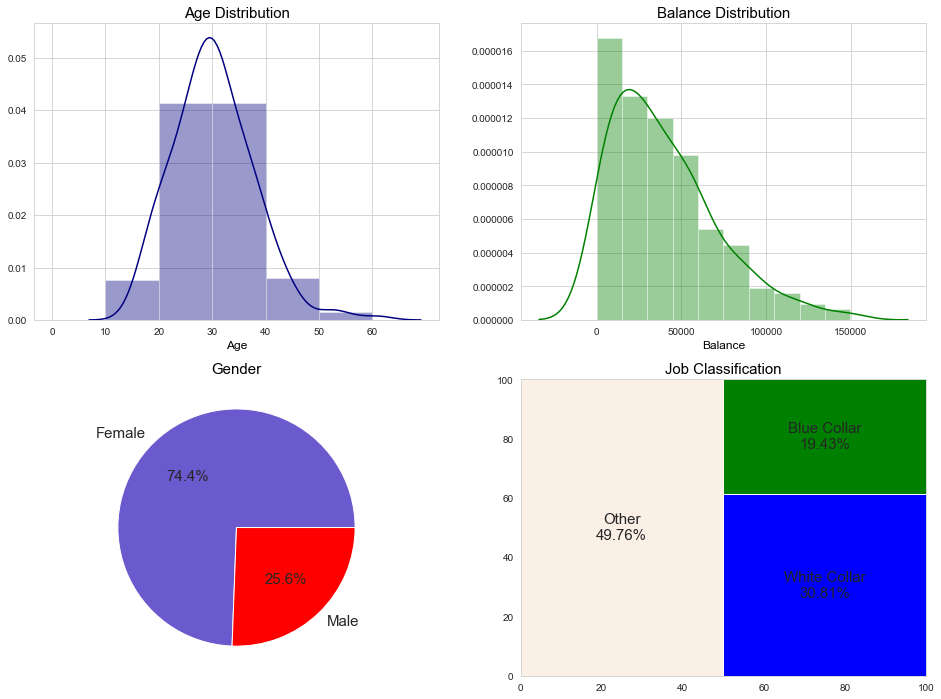

In [28]:
sns.set_style('whitegrid')

f, ax = plt.subplots(2,2, figsize = (16,12))

age_dist(NIR_Age, age_bins, 'navy', ax[0,0], 'Age Distribution', 'Age', age_bins)

balance_dist(NIR_Balance, 10, 'green', ax[0,1], 'Balance Distribution', 'Balance')

gender_pie(NIR_Gender, ax[1,0], 'Gender', NIR_Gender.index)

job_treemap(NIR_Jobs_sorted, NIR_Jobs_sorted.index + '\n' + NIR_Jobs_sorted_p.astype('str') + '%', 
            ax[1,1], 'Job Classification')

### Majority of NIR Customers are women in younger age categories. 